6/6 [==============================] - 0s 1ms/step
Train RMSE: 0.2333185289621947
Train R2: 0.9745661749012784
Test RMSE: 0.23228512447737432
Test R2: 0.9701358486319726
[0.78748 1.1933  1.29012 0.535   2.10911 0.526   1.66    1.09    1.22665
 2.276   1.07    2.34251 0.74157 2.11517 4.044   0.535   3.511   0.81087
 0.89984 1.41    0.86645 0.578   0.97046 5.85354 0.88536 4.30433 5.29913
 3.542   1.07812 0.69213 1.41961 1.29    3.95503 2.27125 0.91553 0.6434
 0.571   0.8675  5.93758 0.94144 1.05809 2.033   1.13226 4.89311 1.19095
 1.03111 0.569   0.7958  1.03765 2.36    0.97036 3.27    1.0526  1.09
 1.3726  0.79842 1.0113  0.73387 1.33    3.192   0.88957 0.95    2.82451
 1.94    1.28    1.11    4.583   1.03    0.94394 1.01    5.72621 1.613
 0.542   3.45227 0.86251 0.83677 4.82675 0.504   1.23    0.612   2.345
 3.595   4.07119 4.98404 0.904   1.29    2.402   1.59321 1.25    2.315
 3.878   0.89519 1.37    2.82495 0.594   1.04765 0.514   2.205   3.153
 0.78253 1.1536  0.539   1.12    0.8115

 5.87009 1.35    0.572  ]
6/6 [==============================] - 0s 2ms/step
[[0.4818524 ]
 [1.5029442 ]
 [1.3968753 ]
 [1.2081465 ]
 [1.1687162 ]
 [0.8131188 ]
 [0.75219166]
 [0.8133197 ]
 [1.1190408 ]
 [3.0177891 ]
 [1.1740942 ]
 [1.127328  ]
 [0.9893224 ]
 [2.5704067 ]
 [0.7954937 ]
 [1.6822287 ]
 [0.4987815 ]
 [5.528895  ]
 [5.02523   ]
 [1.6278082 ]
 [1.2925814 ]
 [0.5593158 ]
 [1.0237943 ]
 [3.9315379 ]
 [1.4101585 ]
 [1.156244  ]
 [2.292218  ]
 [0.74010813]
 [1.0804974 ]
 [0.78128517]
 [0.9894533 ]
 [0.5731347 ]
 [0.5089027 ]
 [2.9124358 ]
 [1.3529085 ]
 [5.4171033 ]
 [5.169072  ]
 [2.0086553 ]
 [3.9112895 ]
 [4.9679313 ]
 [1.818415  ]
 [0.8803059 ]
 [1.226435  ]
 [1.0600451 ]
 [1.3833185 ]
 [1.729798  ]
 [3.962053  ]
 [4.2903666 ]
 [1.1256202 ]
 [1.4886658 ]
 [0.73929524]
 [0.99609417]
 [1.3386275 ]
 [0.5084287 ]
 [0.8852309 ]
 [0.7745258 ]
 [1.0490643 ]
 [2.1992993 ]
 [0.48903453]
 [0.7490226 ]
 [3.1310508 ]
 [3.7008064 ]
 [0.9759157 ]
 [0.58805674]
 [5.7136126 ]
 [1.260178  ]

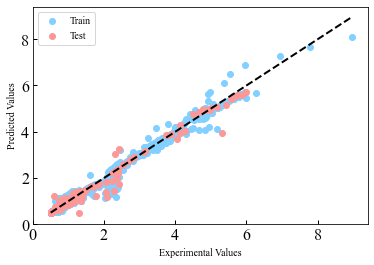

In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
from matplotlib import rcParams
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

data_train = np.loadtxt('Total/total.csv', delimiter=",", dtype="float")
# pre = np.loadtxt('binary/yang-yanzheng/Al-Cu/yi-er-yuan/Al4Cu.csv', delimiter=",", dtype="float")

X = data_train[..., 0:6]
y = data_train[..., 6]
# print(y)

# Standardize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model parameters
input_shape = X.shape[1]
learning_rate = 0.01
epochs = 150
batch_size = 64
reg = None

# Function to create a new model
def create_model(learning_rate=0.001, neurons=64, reg=None):
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu', kernel_regularizer=reg))
    model.add(Dense(64, activation='relu', kernel_regularizer=reg))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))
    return model

# Training and evaluation

model = create_model()
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))


rmse = np.sqrt(mse(y_train, model.predict(X_train)))
r2 = r2_score(y_train, model.predict(X_train))
rmset = np.sqrt(mse(y_test, model.predict(X_test)))
r2t = r2_score(y_test, model.predict(X_test))
print('Train RMSE:', rmse)
print('Train R2:', r2)
print('Test RMSE:', rmset)
print('Test R2:', r2t)


print(y_train)
print(model.predict(X_train))
print(y_test)
print(model.predict(X_test))

    
# # # 设置字体样式为"Times New Roman"
plt.rcParams["font.family"] = "Times New Roman"
plt.scatter(y_train, model.predict(X_train), color='#82D0FF', label='Train')
plt.scatter(y_test, model.predict(X_test), color='#FC9898', label='Test')

# 增加对角线
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--',
         linewidth=2)
# x和y坐标起始与间隔
plt.xticks(np.arange(0, 10, 2), fontsize=16)
plt.yticks(np.arange(0, 10, 2), fontsize=16)
# 数据点线朝内
plt.tick_params(axis='both', direction='in', length=4, width=1, colors='black')

plt.xlabel("Experimental Values")
plt.ylabel("Predicted Values")
# plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()